In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
h=0.2
t = np.arange(0,6,h)
y0 = 10
v0 = 18

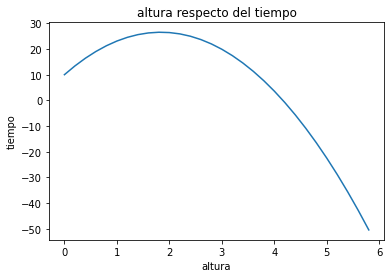

el tiempo total de vuelo es de 5.1020408163265305s
la altura máxima con funcion es de 26.53061224489796 m
la altura máxima con numpy es de 26.523999999999994 m


In [3]:
def tiroVertical(t,y0,v0):
  g=-9.8
  y = y0+v0*t+(g/2)*t**2
  return y

#la altura respecto del tiempo

x=tiroVertical(t,y0,v0)
plt.xlabel('altura')
plt.ylabel('tiempo')
plt.plot(t,x)
plt.title('altura respecto del tiempo')
plt.show()

#el tiempo de vuelo 

def tiempoVuelo(v0,y0):
  g=-9.8
  tv1=2*(v0/abs(g))
  if abs(y0) >0: 
    tv2= math.sqrt((2*y0)/abs(g))
  else:
    tv2=0
  tv = tv1+tv2
  return tv
print('el tiempo total de vuelo es de ' + str(tiempoVuelo(v0,y0)) +'s')

#la altura máxima

def alturaMax(v0,y0):
  g=-9.8
  h_max=y0 +(-v0**2)/(2*g)
  return h_max 
print('la altura máxima con funcion es de ' + str(alturaMax(v0,y0)) +' m')

h_max2=np.max(x)
print('la altura máxima con numpy es de ' + str(h_max2) +' m')

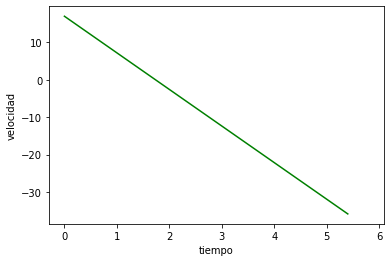

In [4]:
#si trabajo con arrays como si fueran listas (asi se vio hasta 2023)
def deriv(x,t):
  j= len(x) - 1
  i=0
  dx=np.zeros(len(x))
  h = t[i+1]-t[i] #t es equidistante, por lo tanto es lo mismo escribir como denominador  t[i+1]-t[i] que h. 
  for i  in range(0, len(x)-1):
    dx[i]= (x[i+1]-x[i])/(h)
  dx[i]=None
  return dx

plt.plot(t, deriv(x,t), color= 'green')
plt.xlabel('tiempo')
plt.ylabel('velocidad')
plt.show()

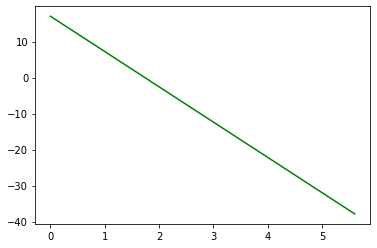

In [10]:
#si trabajo con arrays como debiera hacerlo
def deriv_2(x,t):
    h = t[1]-t[0] #t es equidistante, por lo tanto es lo mismo escribir como denominador  t[i+1]-t[i] que h. 
    x_f = np.roll(x,-1)
    x_f[len(x_f)-1] = None
    dx = (x_f- x )/h
    return dx

plt.plot(t, deriv_2(x,t), color= 'green')


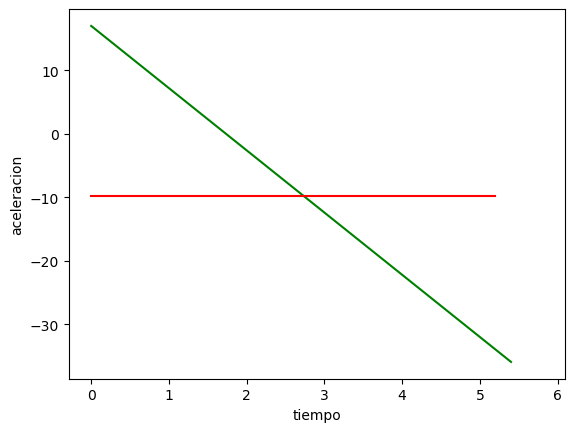

In [ ]:
#aceleraciòn
v = deriv(x,t)
a = deriv(v,t)
plt.plot(t, v,  color= 'green')
plt.plot(t, a,  color= 'red')
plt.xlabel('tiempo')
plt.ylabel('aceleracion')
plt.show()


In [ ]:
#quiero ver los datos 
df = pd.DataFrame({'altura':x,'tiempo':t, 'velocidad':deriv(x,t), 'aceleracion':deriv(deriv(x,t),t)})
display(df)

,altura,tiempo,velocidad,aceleracion
0,10.000,0.0,17.02,-9.8
1,13.404,0.2,15.06,-9.8
2,16.416,0.4,13.10,-9.8
3,19.036,0.6,11.14,-9.8
4,21.264,0.8,9.18,-9.8
5,23.100,1.0,7.22,-9.8
6,24.544,1.2,5.26,-9.8
7,25.596,1.4,3.30,-9.8
8,26.256,1.6,1.34,-9.8
9,26.524,1.8,-0.62,-9.8


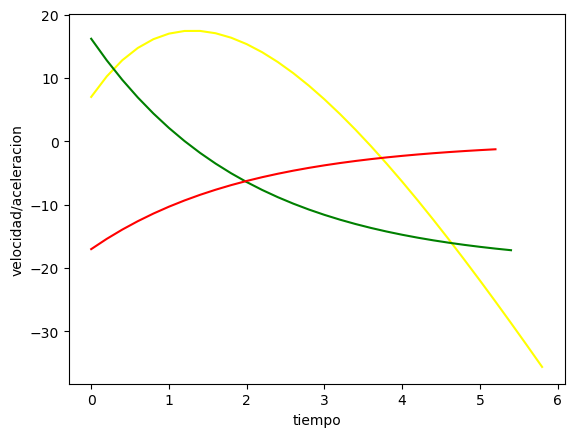

In [ ]:
def tiroVertical2(t):
  g=-9.8
  y=82.2 - 75.2 * math.e**(-t/2) - 19.6 *t
  return y

x2=tiroVertical2(t)
v2 = deriv(x2,t)
a2 = deriv(v2,t)
plt.plot(t, x2,  color= 'yellow')
plt.plot(t, v2,  color= 'green')
plt.plot(t, a2,  color= 'red')
plt.xlabel('tiempo')
plt.ylabel('velocidad/aceleracion')
plt.show()


In [ ]:
#integral! --- mètodo de rectangulos
x = np.arange(0,3,0.0001)
y = x**2
def integral(x,y):
  i=0
  z=0
  while i < len(x)-1:
    z+= y[i+1]* (x[i+1] -x[i]) #donde y es la altura y delta x la base
    i=i+1
  return z 
print(integral(x,y))

8.99955000500003


In [ ]:
#integral! --- mètodo de trapecios
x = np.arange(0,3,0.0001)
y = x**2
def integral(x,y):
  i=0
  z=0
  while i < len(x)-1:
    z+= ((y[i+1]+ y[i])) * (x[i+1] -x[i])/2 #donde y es la altura y delta x la base, se promedian los dos puntos para hacerlo mas preciso
    i=i+1
  return z 
print(integral(x,y))

8.999100034999579
